In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Model from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

In [13]:
np.random.seed(42)
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [14]:
iris_df = pd.DataFrame(iris.data,
                       columns=iris.feature_names)

In [15]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
iris_df["target"] = iris.target

In [17]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## target
* 0: setosa
* 1: versicolor
* 2: virginica

In [21]:
iris_df["sepal length (cm)"].value_counts()

5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: sepal length (cm), dtype: int64

In [22]:
pd.crosstab(iris_df["sepal length (cm)"],iris_df.target)

target,0,1,2
sepal length (cm),,,
4.3,1,0,0
4.4,3,0,0
4.5,1,0,0
4.6,4,0,0
4.7,2,0,0
4.8,5,0,0
4.9,4,1,1
5.0,8,2,0
5.1,8,1,0


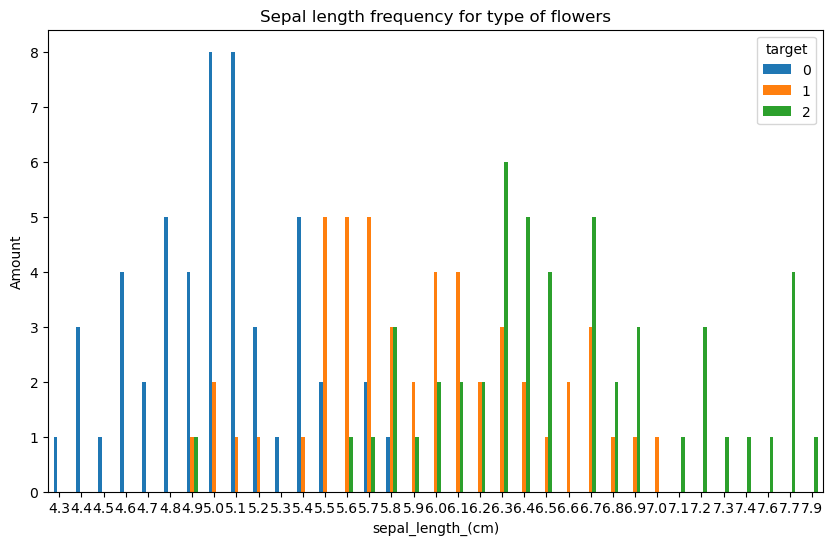

In [32]:
pd.crosstab(iris_df["sepal length (cm)"],iris_df.target).plot(kind="bar",
                                                              figsize=(10,6))
plt.xticks(rotation=0)
plt.xlabel("sepal_length_(cm)")
plt.ylabel("Amount")
plt.title("Sepal length frequency for type of flowers");

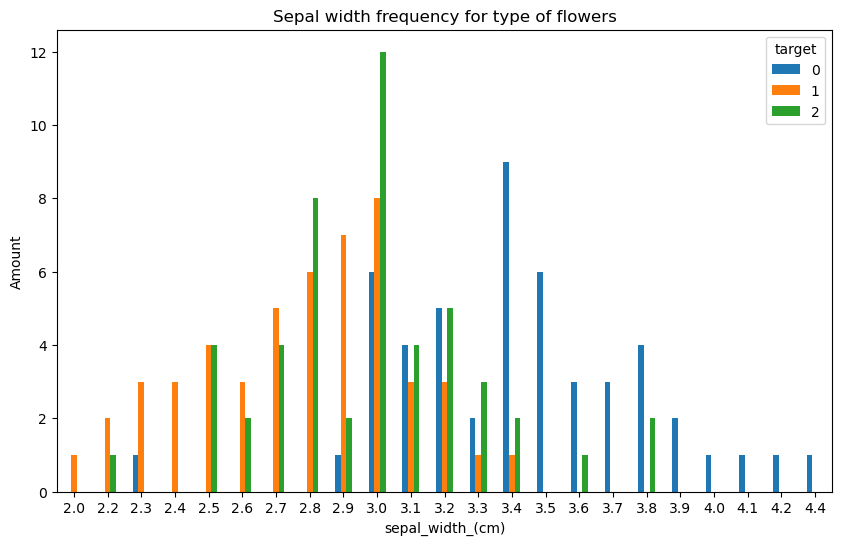

In [33]:
pd.crosstab(iris_df["sepal width (cm)"],iris_df.target).plot(kind="bar",
                                                              figsize=(10,6))
plt.xticks(rotation=0)
plt.xlabel("sepal_width_(cm)")
plt.ylabel("Amount")
plt.title("Sepal width frequency for type of flowers");

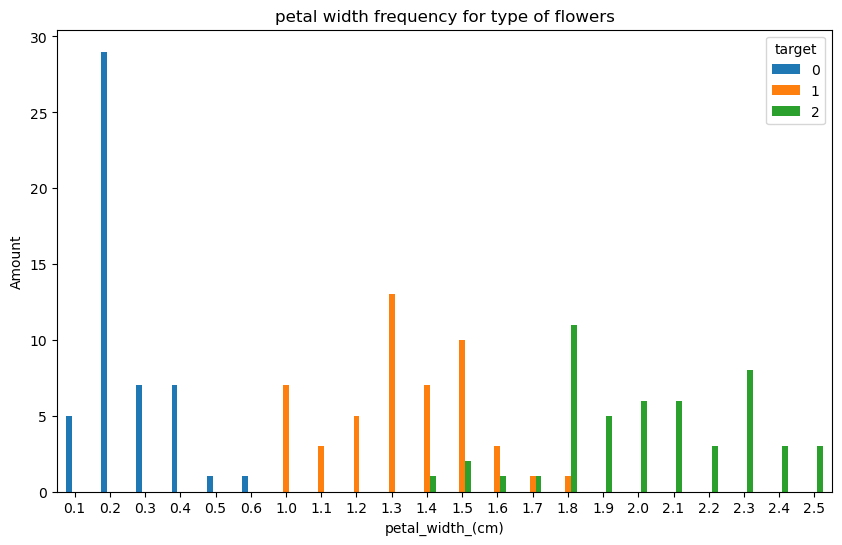

In [46]:
pd.crosstab(iris_df["petal width (cm)"],iris_df.target).plot(kind="bar",
                                                             figsize=(10,6))
plt.xticks(rotation=0)
plt.xlabel("petal_width_(cm)")
plt.ylabel("Amount")
plt.title("petal width frequency for type of flowers");                               

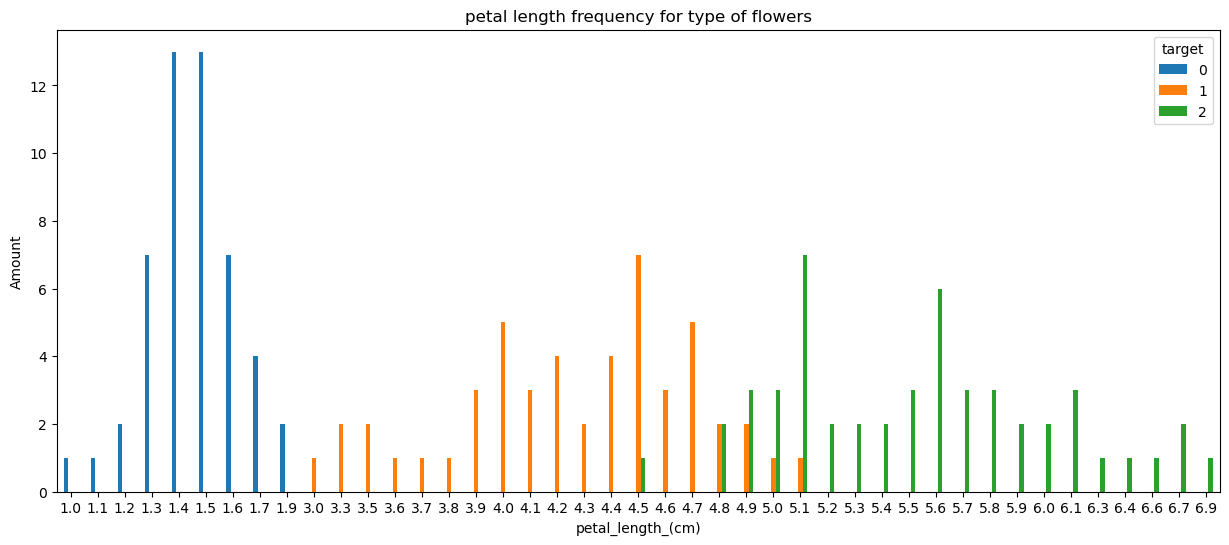

In [48]:
pd.crosstab(iris_df["petal length (cm)"],iris_df.target).plot(kind="bar",
                                                             figsize=(15,6))
plt.xticks(rotation=0)
plt.xlabel("petal_length_(cm)")
plt.ylabel("Amount")
plt.title("petal length frequency for type of flowers");      

In [49]:
corr_matrix = iris_df.corr()

In [50]:
corr_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


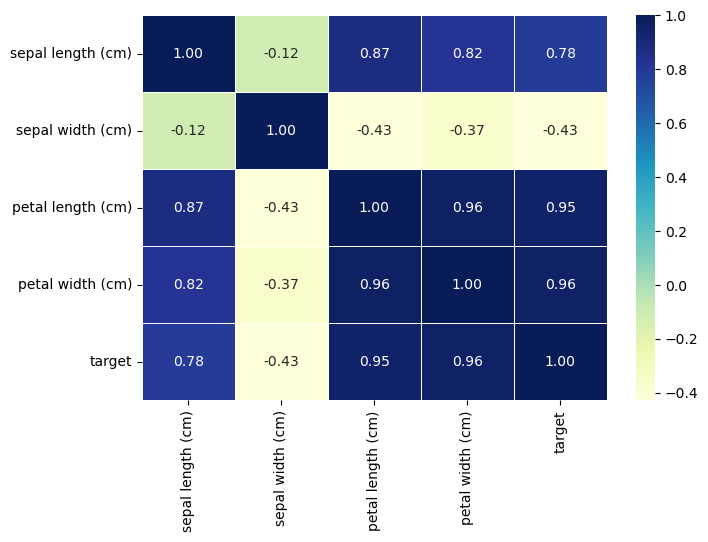

In [53]:
fig,ax=plt.subplots(figsize=(7.5,5))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [54]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [56]:
X = iris_df.drop(["target"],axis=1)
y = iris_df.target

In [57]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [69]:
np.random.seed(41)
models = {"KNeighborsClassifier": KNeighborsClassifier(),
          "RandomForestClassifier":RandomForestClassifier()}
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
def fit_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [70]:
model_scores = fit_score(models=models,
                         X_train=X_train,
                         X_test=X_test,
                         y_train=y_train,
                         y_test=y_test)
model_scores

{'KNeighborsClassifier': 0.9666666666666667, 'RandomForestClassifier': 0.9}

In [74]:
model_compare = pd.DataFrame(model_scores,index=["Accuracy"])
model_compare

,KNeighborsClassifier,RandomForestClassifier
Accuracy,0.966667,0.9


(array([0]), [Text(0, 0, 'Accuracy')])

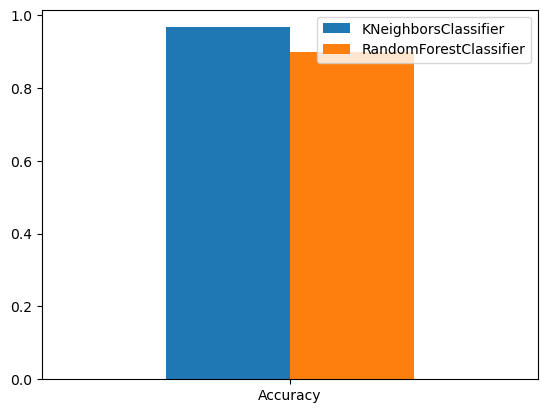

In [76]:
model_compare.plot(kind="bar")
plt.xticks(rotation=0);

In [77]:
better_model = KNeighborsClassifier()

In [102]:
test_para = {"n_neighbors":[1,3,5,7],
        "p":[2]}


In [103]:
the_best = GridSearchCV(estimator=KNeighborsClassifier(),
                                param_grid=test_para,
                                cv = 5,
                                verbose=True)
the_best.fit(X_train,y_train);

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [104]:
the_best.best_params_

{'n_neighbors': 5, 'p': 2}

In [107]:
the_best = KNeighborsClassifier(n_neighbors=5,p=2)
the_best.fit(X_train,y_train);
the_best.score(X_train,y_train)

0.9833333333333333

In [108]:
the_best.score(X_test,y_test)

0.9666666666666667

In [115]:
y_preds = the_best.predict(X_test)

In [116]:
y_preds

array([2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 2,
       0, 0, 1, 1, 1, 1, 0, 1])

In [118]:
a = pd.DataFrame(confusion_matrix(y_test,y_preds))
a

,0,1,2
0,9,0,0
1,0,10,1
2,0,0,10


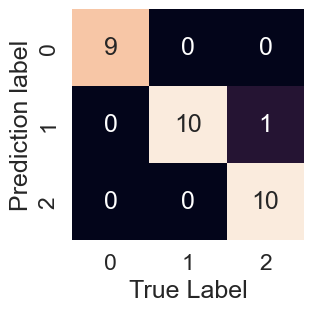

In [119]:
sns.set(font_scale=1.5)
def plot_confusion_matrix(y_test,y_preds):
    fig,ax = plt.subplots(figsize =(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Prediction label")
plot_confusion_matrix(y_test,y_preds)

In [120]:
the_best_acc = cross_val_score(the_best,
                               X,
                               y,
                               cv=5,
                               scoring="accuracy")
the_best_acc = np.mean(the_best_acc)
the_best_acc

0.9733333333333334

In [124]:
import pickle
pickle.dump(the_best,open("KNeighborsClassifier_Iris.pkl","wb"))